In [1]:
## Synthetic Portfolios

In [2]:
from IPython.display import Image

In [3]:
import matplotlib.pyplot as plt

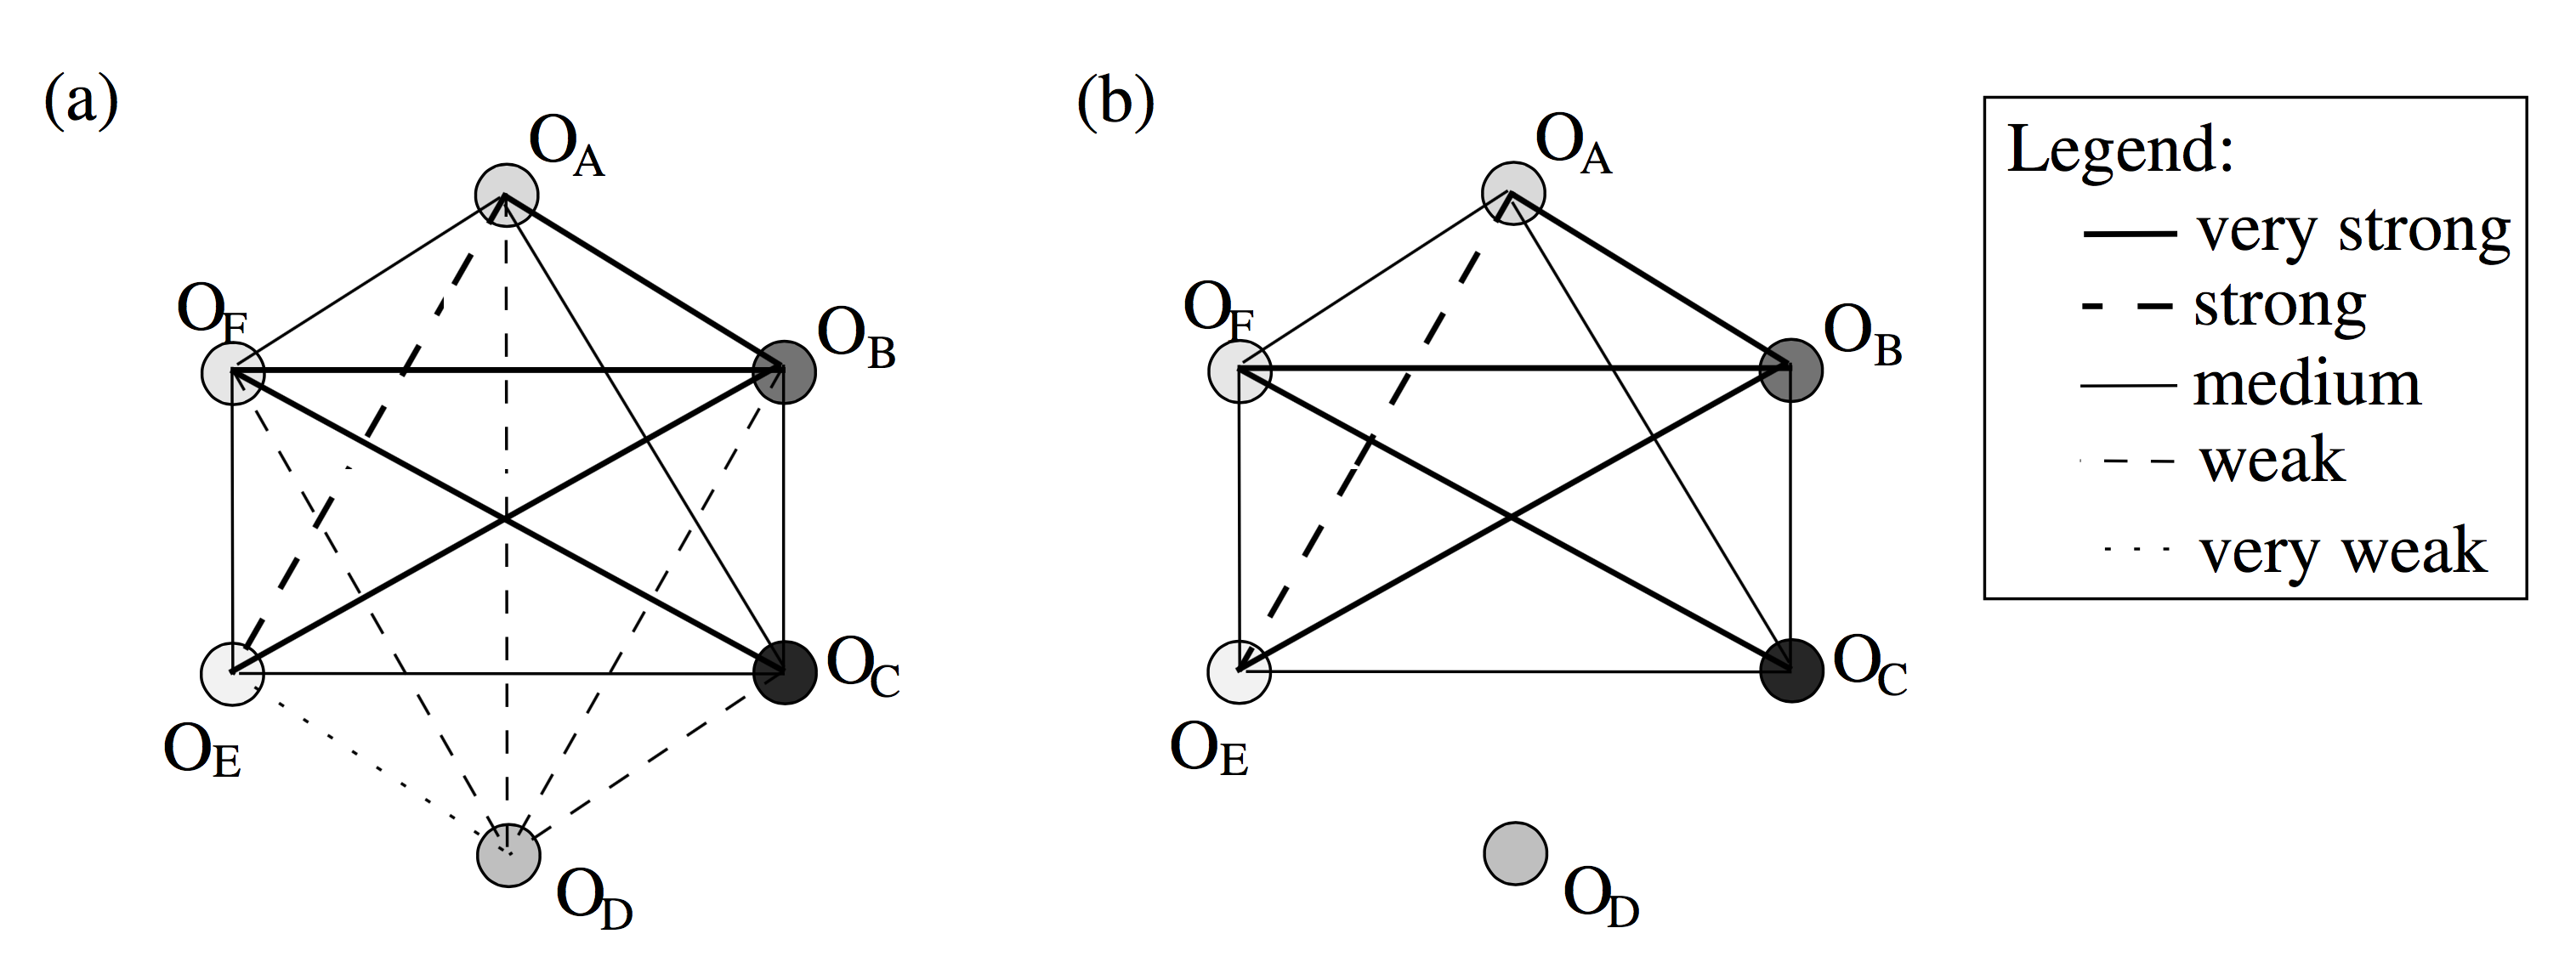

In [4]:
Image(filename='Stylized portfolios.png', retina=True)

In [5]:
very_strong = 0.8
strong = 0.6
medium = 0.4
weak = 0.2
very_weak = 0.05

In [6]:
import numpy as np

a = np.array([[0, very_strong, medium, weak, strong, medium],
[very_strong, 0, medium, weak, very_strong, very_strong],
[medium, medium, 0, weak, medium, very_strong],
[weak, weak, weak, 0, very_weak, weak],
[strong, very_strong, medium, very_weak, 0, medium],
[medium, very_strong, very_strong, weak, medium, 0]])

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
g = nx.from_numpy_matrix(a)

<IPython.core.display.Javascript object>


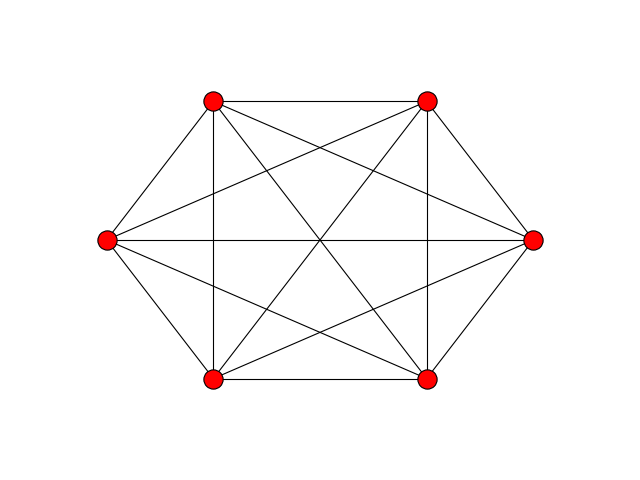

In [18]:
%matplotlib notebook
nx.draw_circular(g, edge_cmap=plt.cm.Blues)

In [10]:
G = nx.Graph()
G.add_nodes_from(g)
G.nodes()
# G.add_nodes_from?

[0, 1, 2, 3, 4, 5]

In [11]:
def ramping_parameter(g, v):
    G = nx.Graph()
    G.add_nodes_from(g.nodes(data=True))
    G = nx.Graph([e for e in g.edges_iter(data=True) if e[2]['weight'] > v])
    return nx.number_connected_components(G), G

In [19]:
[x for x in g.edges_iter(data=True) if x[2]['weight'] > 0.2]

[(0, 1, {'weight': 0.8}),
 (0, 2, {'weight': 0.4}),
 (0, 4, {'weight': 0.6}),
 (0, 5, {'weight': 0.4}),
 (1, 2, {'weight': 0.4}),
 (1, 4, {'weight': 0.8}),
 (1, 5, {'weight': 0.8}),
 (2, 4, {'weight': 0.4}),
 (2, 5, {'weight': 0.8}),
 (4, 5, {'weight': 0.4})]

In [13]:
nx.connected_components?

In [14]:
def ramping(g, value):
    GG = g.copy()
    for e in g.edges_iter(data=True):
        if e[2]['weight'] <= value:
            GG.remove_edge(*e[:2])
    return nx.number_connected_components(GG) * 1.0 / GG.number_of_nodes() , GG

In [15]:
def ramp_up(g):
    x = np.arange(0.0, 1., 0.01)
    y = np.zeros_like(x)
    for i, p in enumerate(x):
        c = ramping(g, p)
        y[i] = c[0]
    return x, y

In [16]:
GG.nodes()
nx.number_connected_components(GG)

NameError: name 'GG' is not defined

In [ ]:
# ramping_parameter(nx.generate_pajek)

In [ ]:
np.random.rand()

In [20]:
import seaborn as sns

<IPython.core.display.Javascript object>


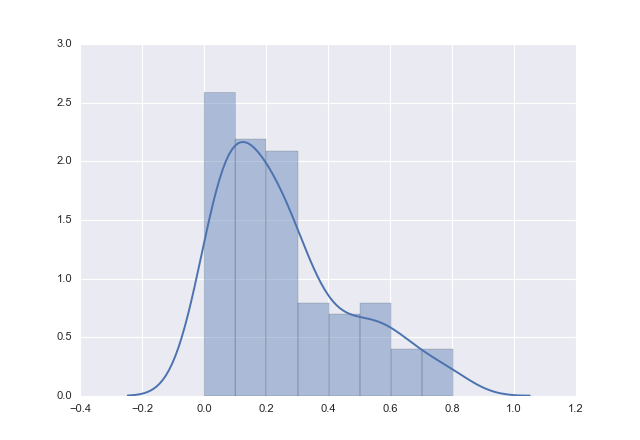

In [21]:
%matplotlib notebook
sns.distplot(1-np.random.power(3, size=100))

In [22]:
def generate_graph(n, weight_dist='pow'):
    """ generates watts strotgatz with uniform weights """
    g100 = nx.generators.watts_strogatz_graph(n, int(0.05 * n), 0.9)
    if weight_dist == 'pow':
        f_weight = lambda: 1-np.random.power(2.1)
    else:
        f_weight = np.random.rand
    for s, t in g100.edges_iter():
        g100[s][t]['weight'] = f_weight()
    return g100

<IPython.core.display.Javascript object>


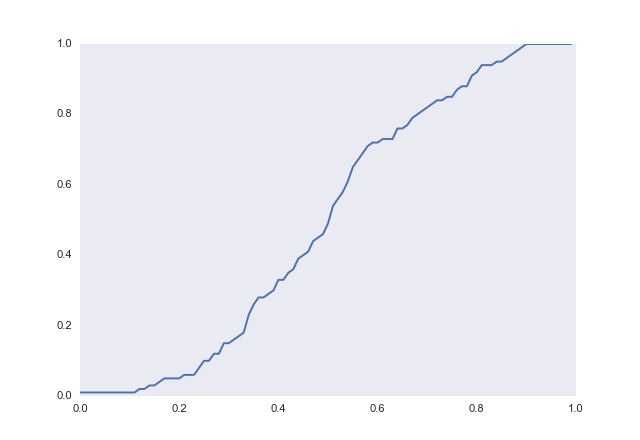

In [23]:
%matplotlib notebook
g1 = generate_graph(100)
x, y = ramp_up(g1)


plt.plot(x,y)

<IPython.core.display.Javascript object>


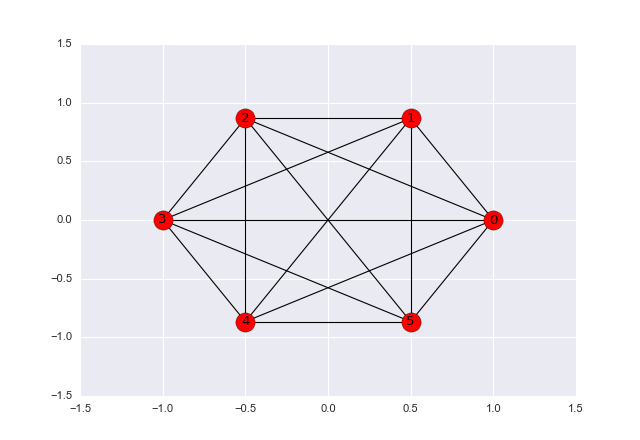

In [32]:
%matplotlib notebook
nx.draw_networkx(g, pos=nx.layout.circular_layout(g))

In [37]:
nx.draw_networkx?

In [38]:
O = [0.01, 0.24, 0.25, .24, .24, .01, .01]

In [45]:
def ramping(g, value):
    GG = g.copy()
    for e in g.edges_iter(data=True):
        if e[2]['weight'] <= value:
            GG.remove_edge(*e[:2])
    return nx.connected_components(GG) # * 1.0 / GG.number_of_nodes() , GG

In [72]:
def cluster_risk(g, O, ramping_value):
    weights = []
    for x in ramping(g, ramping_value):
        weights.append( np.sum([O[n] for n in x]) )
    return weights[np.argmax(weights)] / np.sum(weights)

In [74]:
for i in np.arange(0., 1., 100):
    print(i)

0.0


In [48]:
m = np.zeros((7,7))
m[0,1] = .3
m[6,3] = .6
m[5,4] = .35
g = nx.from_numpy_matrix(m)

<IPython.core.display.Javascript object>


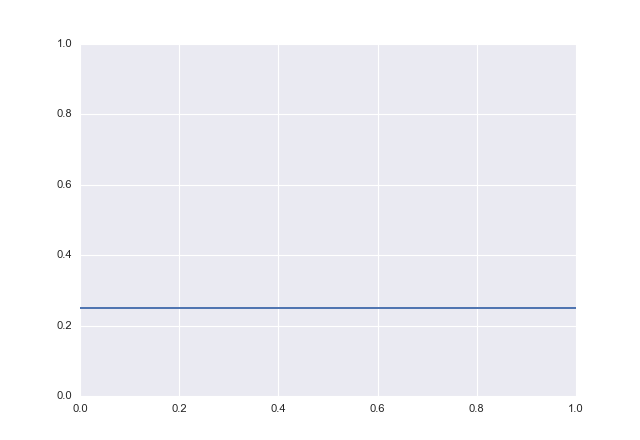

In [95]:
%matplotlib notebook
ramp1 = pd.Series(dict((v, cluster_risk(g, O, v)) for v in np.linspace(0., 1., 100)))
ramp1.plot(ylim=[0,1])

In [89]:
m1 = np.zeros((7,7))
m1[1,2] = 0.4
m1[2,3] = 0.42
m1[3,4] = .51
m1[2,4] = .3
g1 = nx.from_numpy_matrix(m1)

In [80]:
import pandas as pd

<IPython.core.display.Javascript object>


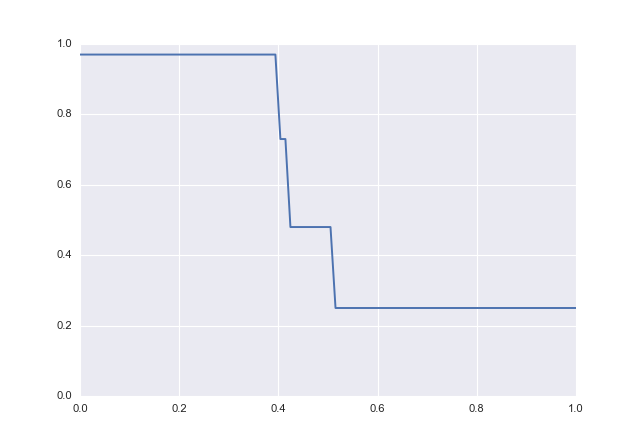

In [94]:
%matplotlib notebook
ramp1 = pd.Series(dict((v, cluster_risk(g1, O, v)) for v in np.linspace(0., 1., 100)))
ramp1.plot(ylim=[0,1])